In [1]:
import os
path = os.path.abspath(os.path.join('..','..'))
import sys
sys.path.append(path)
from reservoirpy.pvtpy import black_oil as bl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Make a Oil object

First create an instance of **oil** object with all the necessary attributes

In [2]:
oil1 = bl.oil(formation='mir',api=31,rsb=675,sg_gas=0.95,temp=180)

## Make pvt table from correlations

By default, there are built-in some correlations to build a black oil pvt

In [3]:
oil1.correlations

{'pb': 'standing',
 'rs': 'standing',
 'bo': 'standing',
 'co': {'above_pb': 'vazquez_beggs', 'below_pb': 'mccain'},
 'muod': 'beal',
 'muo': {'above_pb': 'beal', 'below_pb': 'beggs'},
 'rho': 'banzer'}

 By calling the `pvt_from_correlation` method, a pvt table is constructed with the correlations above. 

In [4]:
oil1.pvt_from_correlations()

,rs,bo,co,muo,rhoo
pressure,,,,,
20.000000,68.070283,1.086794,0.021527,1.809462,50.677969
282.105263,202.271361,1.152460,0.000464,1.175854,49.121421
544.210526,272.920883,1.188878,0.000179,1.010038,48.277638
806.315789,332.079469,1.220202,0.000101,0.908811,47.567999
1068.421053,386.767501,1.249771,0.000067,0.834881,46.913187
1330.526316,439.540115,1.278819,0.000049,0.776254,46.284704
1592.631579,491.619165,1.307948,0.000038,0.727551,45.669386
1854.736842,543.678232,1.337498,0.000030,0.685880,45.060419
2116.842105,596.122570,1.367680,0.000025,0.649501,44.454098


In [5]:
oil1.pvt

,rs,bo,co,muo,rhoo
pressure,,,,,
20.000000,68.070283,1.086794,0.021527,1.809462,50.677969
282.105263,202.271361,1.152460,0.000464,1.175854,49.121421
544.210526,272.920883,1.188878,0.000179,1.010038,48.277638
806.315789,332.079469,1.220202,0.000101,0.908811,47.567999
1068.421053,386.767501,1.249771,0.000067,0.834881,46.913187
1330.526316,439.540115,1.278819,0.000049,0.776254,46.284704
1592.631579,491.619165,1.307948,0.000038,0.727551,45.669386
1854.736842,543.678232,1.337498,0.000030,0.685880,45.060419
2116.842105,596.122570,1.367680,0.000025,0.649501,44.454098


### Different correlations and pressure range
If you like to use different correlation and a different pressure range you can explicitly set

In [6]:
oil1.correlations['bo'] = 'vazquez_beggs'
oil1.correlations

{'pb': 'standing',
 'rs': 'standing',
 'bo': 'vazquez_beggs',
 'co': {'above_pb': 'vazquez_beggs', 'below_pb': 'mccain'},
 'muod': 'beal',
 'muo': {'above_pb': 'beal', 'below_pb': 'beggs'},
 'rho': 'banzer'}

In [7]:
oil1.pvt_from_correlations(start_pressure=750, end_pressure=4200, n=10)

,rs,bo,co,muo,rhoo
pressure,,,,,
750.000000,162.352140,1.132409,0.000111,1.303815,49.593235
1133.333333,263.406691,1.183908,0.000061,1.029021,48.391651
1516.666667,371.669716,1.241552,0.000040,0.853772,47.093691
1900.000000,485.641687,1.304582,0.000029,0.732751,45.739720
2283.333333,604.385741,1.372472,0.000022,0.644205,44.359273
2666.666667,674.929091,1.413767,0.000016,0.626102,43.756532
3050.000000,674.929091,1.413767,0.000014,0.641520,43.534577
3433.333333,674.929091,1.413767,0.000013,0.656939,43.362962
3816.666667,674.929091,1.413767,0.000011,0.672358,43.226306


## PVT Class

If you have already a PVT table you can incorporate to a **oil** class. 

`oil_pvt` object is a subclass of `pandas.DataFrame` in which you can upload a table with the `pressure` column to make inperpolation. 

In the case you use the `pvt_from_correlations` method, it is actually a `oil_pvt` class

In [8]:
type(oil1.pvt)

reservoirpy.pvtpy.black_oil.pvt.pvt

In [9]:
oil1.pvt.interpolate([3300,2500],['muo','rs'])

,muo,rs
pressure,,
3300,0.651576,674.929091
2500,0.633973,644.258069


In [10]:
oil1.pvt.interpolate([2140,3300],['rs','muo'])

,rs,muo
pressure,,
2140,559.985790,0.677314
3300,674.929091,0.651576


In [11]:
oil1.pvt.interpolate([2140,3300])

,rs,bo,co,muo,rhoo
pressure,,,,,
2140,559.985790,1.347087,0.000025,0.677314,44.875440
3300,674.929091,1.413767,0.000013,0.651576,43.422654


#### Make a pvt table 

In [12]:
d = {'pressure':[0,100,200,300,400,500,704],'rs':[0,20,30,50,60,100,120]}
p = bl.pvt(d)
print(type(p))

<class 'reservoirpy.pvtpy.black_oil.pvt.pvt'>


In [13]:
p

,rs
pressure,
0,0
100,20
200,30
300,50
400,60
500,100
704,120


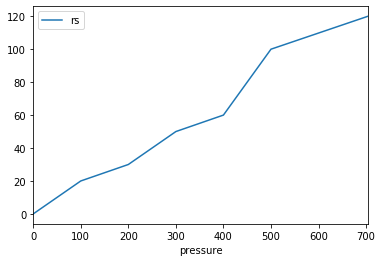

In [14]:
d = {'pressure':[0,100,200,300,400,500,704],'rs':[0,20,30,50,60,100,120]}
p = bl.pvt(d)
p.plot()

In [15]:
rs=675
api=31
sg_gas=0.95
temp = 180
y_co2 = 0.2
y_h2s = 0.1
pb = 1800
p = 2000
bg = 0.00123 #by/pcn

In [16]:
pb_cor = bl.pb(rs=rs,
               temp=temp,
               sg_gas=sg_gas,
               api=api,
               y_co2=y_co2,
               y_h2s=y_h2s,
               multiple=False,
               correction=True,
               method='standing')
pb_cor

,pb
temp,
180,2174.376878


In [17]:
rs_cor=bl.rs(p=p,
             temp=temp,
             sg_gas=sg_gas,
             api=api,
             pb=pb,
             multiple=True,
             method=['standing','laster','glaso','vazquez_beggs'])
rs_cor

,rs_standing,rs_laster,rs_vazquez_begss,rs_glaso
pressure,,,,
2000,455.418283,412.321256,394.065045,384.848898


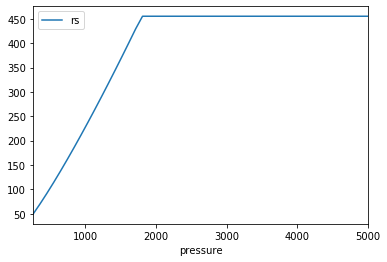

In [18]:
_p = np.linspace(264,5000,50)
rs_cor=bl.rs(p=_p,
             temp=temp,
             sg_gas=sg_gas,
             api=api,
             pb=pb, 
             rsb=450,
             multiple=False,
             methods='standing')
rs_cor.plot()

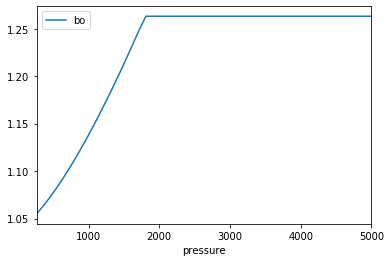

In [19]:
bo_cor=bl.bo(p=_p,
             rs=rs_cor['rs'].values,
             temp=temp,
             sg_gas=sg_gas,
             api=api,
             pb=pb,
             multiple=False,
             method='glaso')
bo_cor.plot()

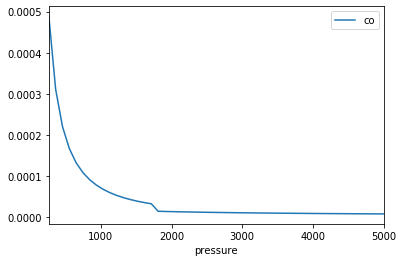

In [22]:
co_cor=bl.co(p=_p, 
             rs=rs_cor['rs'].values, 
             temp=temp, 
             pb=pb, 
             sg_gas=sg_gas, 
             api=api,
             bo=bo_cor['bo'],
             bg=np.full(_p.shape,bg), 
             method_above_pb='petrosky', 
             method_below_pb='mccain')
co_cor.plot()

In [23]:
help(bl.co)

Help on function co in module reservoirpy.pvtpy.black_oil.correlations:

co(p=None, rs=None, pb=None, temp=None, sg_gas=None, api=None, bo=None, method_above_pb='vazquez_beggs', method_below_pb='mccain', **kwargs)
    Estimate the Oil compresibility in 1/psi
    
    Input: 
        p -> (int,float,list,np.array) Interest Pressure [psi]
        rs -> (int,float,np.array) Gas Oil Ratio scf/bbl
        pb -> (int,float,np.array) Bubble Point [psi]
        temp ->  (int,float,np.array) Temperature [F]
        sg_gas -> (int,float,np.array) Gas specifi gravity
        api -> (int,float,np.array) Oil API gravity [API]
        bo -> (list,np.array) Oil Volumetric factor
        bg -> (list,np.array) Gas Volumetric factor
        method_above_pb -> (list, default 'vazquez_beggs') method to use above the bubble point
                            ['vazquez_beggs','petrosky','kartoatmodjo']
        method_below_pb -> (list, default 'mccain') method to use below the bubble point
                  

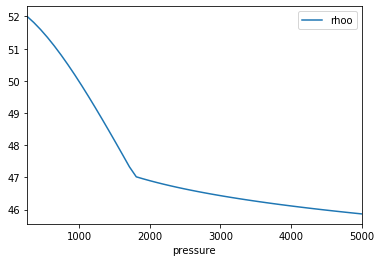

In [24]:
rho_cor=bl.rho_oil(p=_p,
                   co=co_cor['co'].values,
                   bo=bo_cor['bo'].values,
                   rs=rs_cor['rs'].values,
                   api=api,
                   pb=pb)
rho_cor.plot()

In [25]:
_muod = bl.muod(temp=temp,api=api, method=['beal','beggs','glaso'])
_muod

,muod_beal,muod_beggs,muod_glaso
temp,,,
180,2.654527,3.035358,2.75824


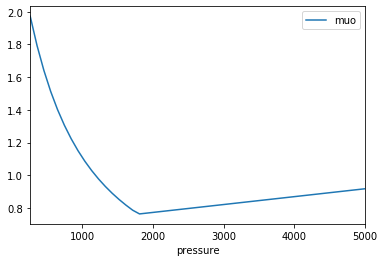

In [26]:
muo_cor=bl.muo(p=_p,
    rs=rs_cor['rs'].values,
    temp=temp,
    api=api,
    pb=pb,
    method_below_pb='beggs',
    method_above_pb='beal',
    method_dead = 'beal'
    )

muo_cor.plot()

In [27]:
h=None
g=type(h)
isinstance(h,type(None))

True

In [28]:
g

NoneType